In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
#importing the modules for plotting and for exploratory analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing modules for train and test and Feature Scaling
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.grid_search import GridSearchCV

#Logistic Regression model import
from sklearn.linear_model import LogisticRegression


#Model Evaluation modules
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn import metrics

#Random calssifier
from sklearn.ensemble import RandomForestClassifier

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [4]:
#visualizing how data looks
DataAuditRisk = pd.read_csv('audit_risk.csv')
#DataAuditRisk.head(5)
#DataAuditRisk.tail(5)


In [5]:
#Finiding column names
DataAuditRisk.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [6]:
#Removing these columns as they dont provide much insight for the analysis
DataAuditRisk.drop(['LOCATION_ID','TOTAL'], axis=1, inplace=True)

In [7]:
#Using pandas to give info about the columns; see what are the data types of column names
DataAuditRisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 25 columns):
Sector_score      776 non-null float64
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CONTROL_RISK      776 non-null float64
Detection_Risk    776 non-null float64
Au

In [8]:
# Using give the eagle view of the data by giving stats like mean, variance and IQR values
DataAuditRisk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,5.067655,0.223711,1.152964,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,0.264449,0.080352,0.537417,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,9.000000,0.600000,5.400000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [9]:
#Checking any null values in the in the columns
print("The number of Null values :{}".format(DataAuditRisk.isnull().sum()))

The number of Null values :Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


In [10]:
#Imputing the null value with its column mean
DataAuditRisk['Money_Value'].fillna((DataAuditRisk['Money_Value'].mean()), inplace=True)

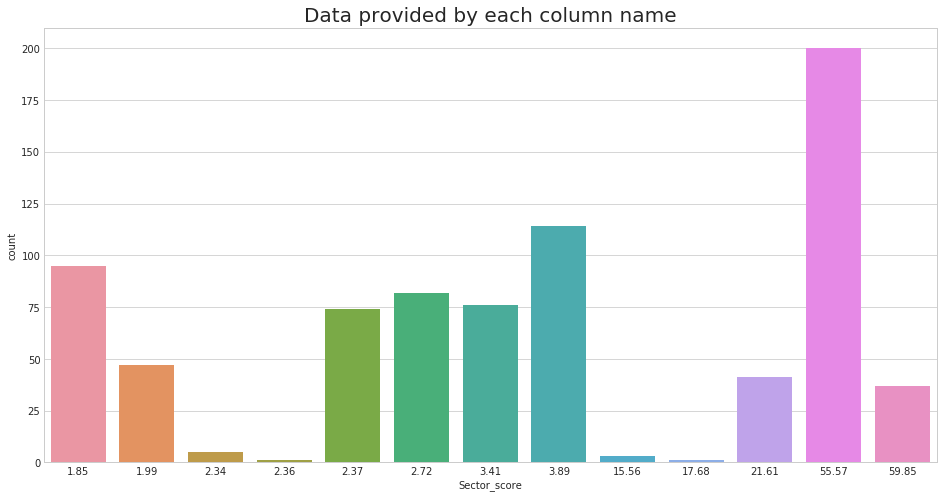

In [11]:
#Visualizing the data, by changing DataAuditRisk[<attribute>].
plt.figure(figsize=(16,8))
plt.title('Data provided by each column name',fontsize=20)
sns.countplot(DataAuditRisk['Sector_score'],data= DataAuditRisk)
plt.show()


In [12]:
#Vizualizing the risk factor for each attribute names
DataWithoutRisk = DataAuditRisk.drop(['Risk'],axis=1)
#DataAuditRisk.head(2)


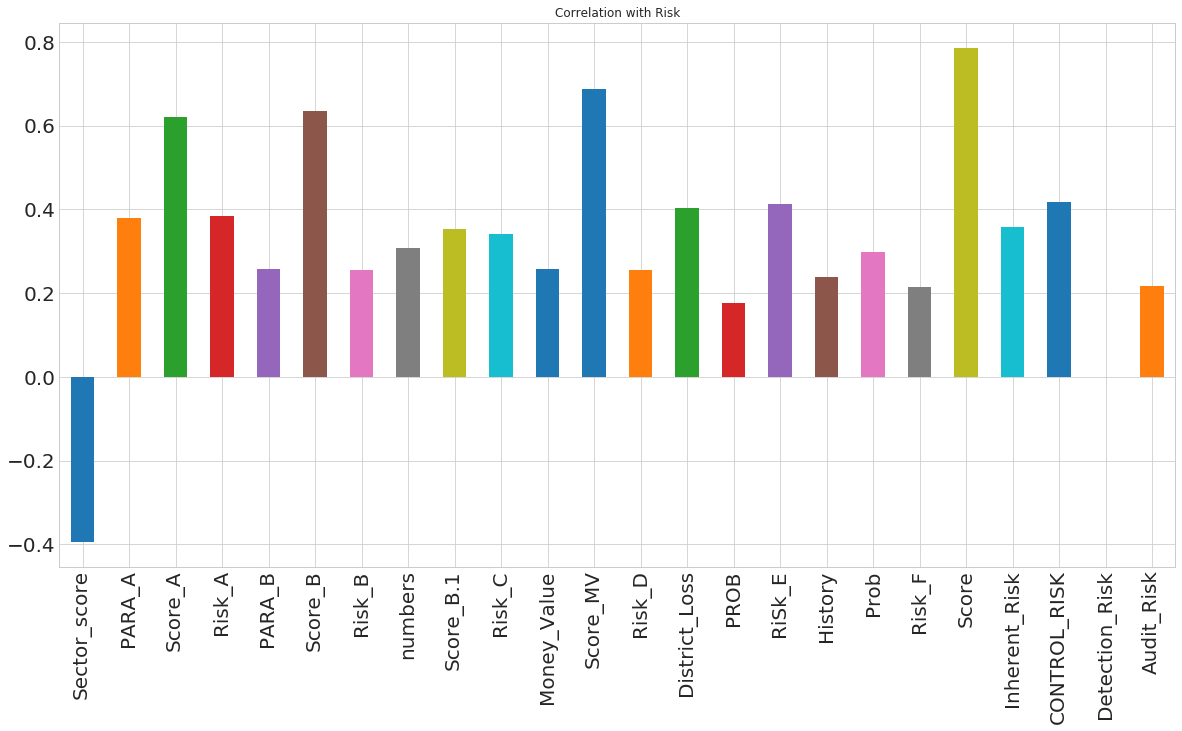

In [13]:
DataWithoutRisk.corrwith(DataAuditRisk.Risk).plot.bar(figsize=(20,10),title="Correlation with Risk",fontsize=20,rot=90,grid=True)

In [14]:
#finsing which attribute correlatives with other
DataWithoutRisk.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.3,0.25,nan,0.25


In [15]:
#Removing Detection Risk as it has no correlation
DataWithoutRisk=DataWithoutRisk.drop(['Detection_Risk'],axis=1)

In [16]:
#Taking Risk to new variable Output Prediction 
OutputPrediciton = DataAuditRisk['Risk']
#OutputPrediciton.head()

In [17]:
#Spliting Data for training and evaluation; 80% tesing 20% Validation
X_train,X_test,Y_train,Y_test = train_test_split(DataWithoutRisk,OutputPrediciton,test_size=0.2) 


In [18]:
#Feature Scaling
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test))

In [19]:
#Applying Logistic Regression
AppLogisiticRegression = LogisticRegression(random_state = 0, penalty = 'l1')
AppLogisiticRegression.fit(X_train_scaled, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#Kfold Cross Validation
kfold = model_selection.KFold(n_splits=10,random_state=7)
OutputAppliedLogisticRegression = cross_val_score(estimator=AppLogisiticRegression,X = X_train_scaled, y = Y_train, cv = kfold, scoring='accuracy')
OutputAppliedLogisticRegression.mean()

0.9741935483870968

In [21]:
#kfold logistic regration Model Evaluation
OutputAppliedLogisticRegression = AppLogisiticRegression.predict(X_test_scaled)
Accuracy= accuracy_score(Y_test, OutputAppliedLogisticRegression)
ROC=roc_auc_score(Y_test, OutputAppliedLogisticRegression)
Precision = precision_score(Y_test, OutputAppliedLogisticRegression)
Recall = recall_score(Y_test, OutputAppliedLogisticRegression)
F1Score = f1_score(Y_test, OutputAppliedLogisticRegression)

results = pd.DataFrame([['Logistic Regression',Accuracy, OutputAppliedLogisticRegression.mean(),Precision,Recall, F1Score,ROC]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.948718,0.403846,1.0,0.887324,0.940299,0.943662


In [22]:
#Logistic Regression Using GridSearchCV
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
LRGV = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
LRGV.fit(X_train, Y_train)

print(LRGV.best_estimator_)
print(LRGV.score(X_test, Y_test))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
1.0


In [23]:
#kfold logistic regration Model Evaluation
OutputLRGV = LRGV.predict(X_test_scaled)
Accuracy= accuracy_score(Y_test, OutputLRGV)
ROC=roc_auc_score(Y_test, OutputLRGV)
Precision = precision_score(Y_test, OutputLRGV)
Recall = recall_score(Y_test, OutputLRGV)
F1Score = f1_score(Y_test, OutputLRGV)

LRGVresults = pd.DataFrame([['Logistic Regression using Grid Search',Accuracy, OutputAppliedLogisticRegression.mean(),Precision,Recall, F1Score,ROC]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(LRGVresults,ignore_index=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.948718,0.403846,1.000000,0.887324,0.940299,0.943662
1,Logistic Regression using Grid Search,0.775641,0.403846,0.928571,0.549296,0.690265,0.757001


In [24]:
# Applying Random Forest

ApplyRF = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
ApplyRF.fit(X_train_scaled, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=47, verbose=0, warm_start=False)

In [25]:
OuputRF=cross_val_score(estimator=ApplyRF,X=X_train_scaled,y=Y_train,cv=kfold,scoring='accuracy')
OuputRF.mean()

0.9983870967741936

In [26]:
#kfold Random Forest Model Evaluation
OutputApplyRF = ApplyRF.predict(X_test_scaled)
Accuracy= accuracy_score(Y_test, OutputApplyRF)
ROC=roc_auc_score(Y_test, OutputApplyRF)
Precision = precision_score(Y_test, OutputApplyRF)
Recall = recall_score(Y_test, OutputApplyRF)
F1Score = f1_score(Y_test, OutputApplyRF)

RFresults = pd.DataFrame([['Random Forest',Accuracy, OutputApplyRF.mean(),Precision,Recall, F1Score,ROC]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


In [27]:
results = results.append(RFresults,ignore_index=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.948718,0.403846,1.000000,0.887324,0.940299,0.943662
1,Logistic Regression using Grid Search,0.775641,0.403846,0.928571,0.549296,0.690265,0.757001
2,Random Forest,0.858974,0.314103,1.000000,0.690141,0.816667,0.845070


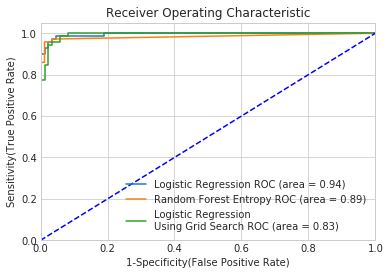

In [38]:
#Plotting ROC AUC curve

plt.figure()

# Add the models to the list that you want to view on the ROC plot
AppliedModels = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l1'),
},
{
    'label': 'Random Forest Entropy',
    'model': RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 20),
},
{
    'label': 'Logistic Regression \nUsing Grid Search',
    'model': GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5),
    
},
    
]

# Below for loop iterates through your models list
for CurrentModel in AppliedModels:
    model = CurrentModel['model'] # select the model
    model.fit(X_train_scaled, Y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr,label='%s ROC (area = %0.2f)' % (CurrentModel['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

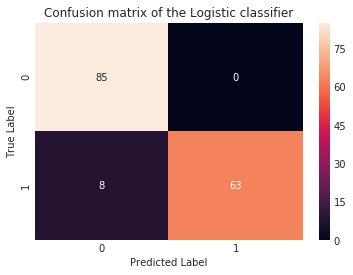

In [29]:
#Logistic Regression Confusion Matrix
CMLG = confusion_matrix(Y_test, OutputAppliedLogisticRegression)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(CMLG,annot=True,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

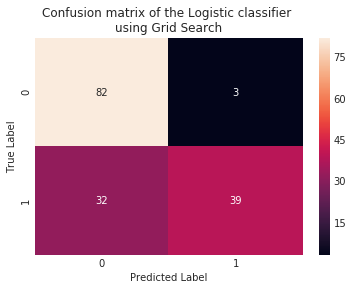

In [30]:
#Logistic Regression using grid search Confusion Matrix

OLGGS = confusion_matrix(Y_test, OutputLRGV)
plt.title('Confusion matrix of the Logistic classifier \nusing Grid Search')
sns.heatmap(OLGGS,annot=True,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

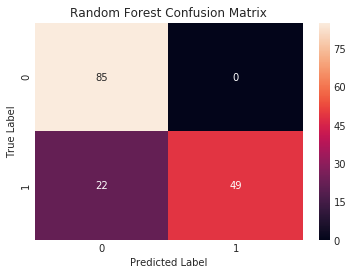

In [31]:
#Random Forest Confusion Matrix
CMRF = confusion_matrix(Y_test, OutputApplyRF)
sns.heatmap(CMRF,annot=True,fmt="d")
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [32]:
#Model selection in the end

"""I ran the model multiple times for these three models and I suggest using Random Forest and Linear Regression model for prediction
Reason:
    *Less Biased
    *Did not overfit multiple times
    *I took consideration of multiple metrics,confusion matrix and ROC curve.
    *The models were stable for different ratio of testing and validation."""
    

'I ran the model multiple times for these three models and I suggest using Random Forest and Linear Regression model for prediction\nReason:\n    *Less Biased\n    *Did not overfit multiple times\n    *I took consideration of multiple metrics,confusion matrix and ROC curve.\n    *The models were stable for different ratio of testing and validation.'

In [33]:
#References
    #Confusion Matrix 
        #https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
    #Roc Curve
        #https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    #Preprocessing and clearing the data 
        #https://www.kaggle.com/
    #Models
        #https://www.kaggle.com/
        #https://www.Appliedaicourse.com/